<a href="https://colab.research.google.com/github/lukiod/dl-college/blob/main/lab10_vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_7 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.3887 - val_loss: 0.3110
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.3075 - val_loss: 0.3055
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3018 - val_loss: 0.3026
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2991 - val_loss: 0.3003
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2978 - val_loss: 0.2991
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2963 - val_loss: 0.2978
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2952 - val_loss: 0.2967
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2944 - val_loss: 0.2958
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2930 - val_loss: 0.2951
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2925 - val_loss: 0.2948
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2923 - val_loss: 0.2942
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/ste

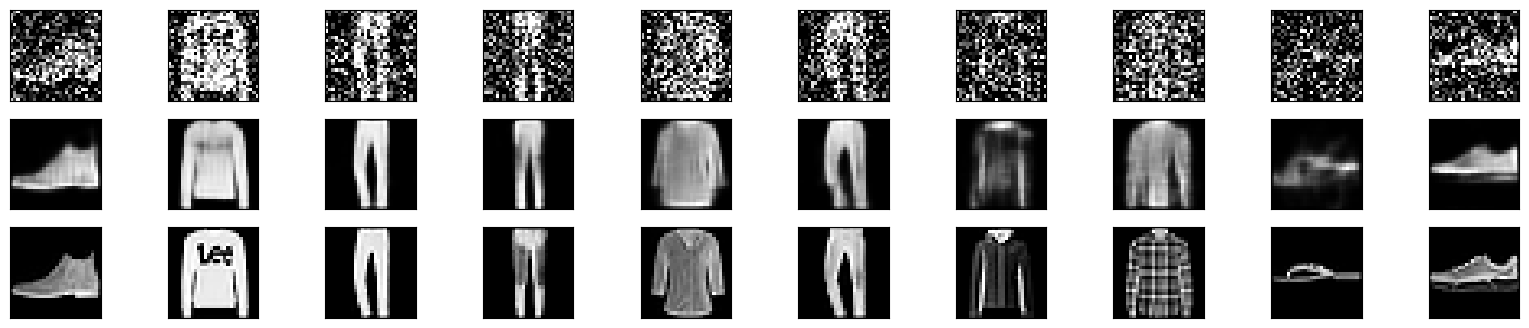

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test), callbacks=[early_stopping])

denoised_images = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_8 (UpSampling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_9 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 0.6130 - val_loss: 0.5670
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.5667 - val_loss: 0.5629
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.5622 - val_loss: 0.5609
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.5599 - val_loss: 0.5602
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5597 - val_loss: 0.5594
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5588 - val_loss: 0.5585
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5577 - val_loss: 0.5581
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.5578 - val_loss: 0.5580
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5570 - val_loss: 0.5576
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.5567 - val_loss: 0.5572
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5558 - val_loss: 0.5570
Epoch 12/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 

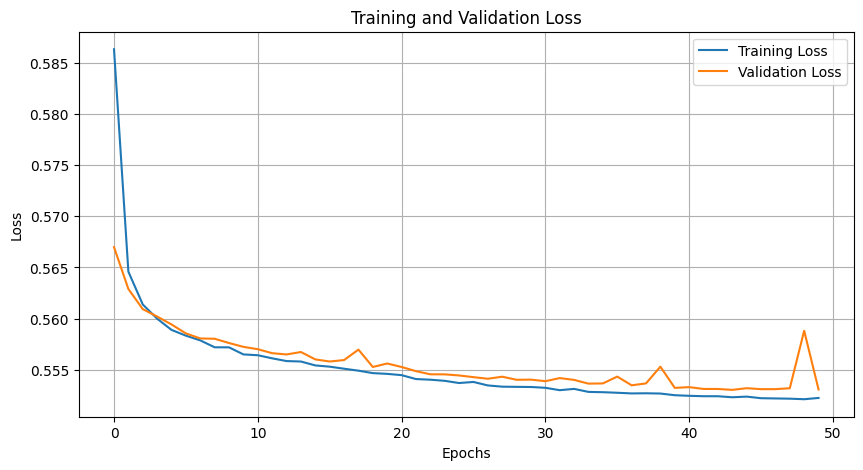

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


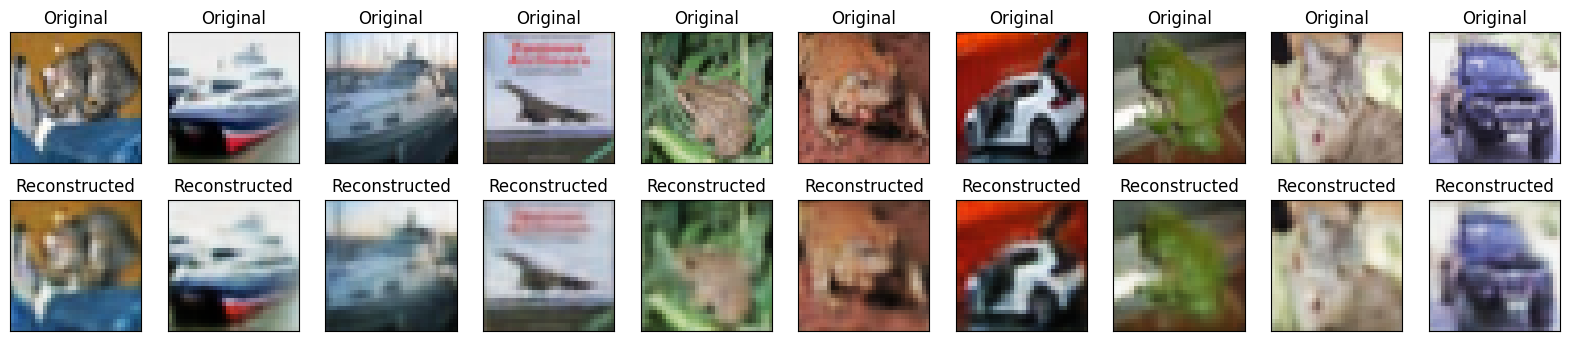

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the autoencoder architecture
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create and compile the autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()
# Train the autoencoder and store the history
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Reconstruct test images (optional: include visualization as before)
decoded_imgs = autoencoder.predict(x_test)

# Visualization of original vs reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS = 32, 32, 3
BATCH_SIZE = 128
LATENT_DIM = 128
EPOCHS = 50

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = y_train.flatten()
y_test = y_test.flatten()

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

train_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_dataset = test_dataset.batch(BATCH_SIZE)


encoder_inputs = keras.Input(shape=(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)

z_mean = layers.Dense(LATENT_DIM, name="z_mean")(x)
z_log_var = layers.Dense(LATENT_DIM, name="z_log_var")(x)

def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(LATENT_DIM,), name="z")([z_mean, z_log_var])

encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()


latent_inputs = keras.Input(shape=(LATENT_DIM,))
x = layers.Dense(8 * 8 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((8, 8, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(IMG_CHANNELS, 3, activation="sigmoid", padding="same")(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        if isinstance(data, tuple):
             if len(data) == 2:
                 data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2),
                )
            )

            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(
                    1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var),
                    axis=1,
                )
            )
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {m.name: m.result() for m in self.metrics}


    def test_step(self, data):
        if isinstance(data, tuple):
            if len(data) == 2:
                 data = data[0]

        z_mean, z_log_var, z = self.encoder(data)
        reconstruction = self.decoder(z)

        reconstruction_loss = tf.reduce_mean(
            tf.reduce_sum(
                keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
            )
        )
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1
            )
        )
        total_loss = reconstruction_loss + kl_loss

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {m.name: m.result() for m in self.metrics}

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstruction = self.decoder(z)
        return reconstruction


vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

print("\nStarting VAE Training...")
history = vae.fit(x_train, x_train,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  validation_data=(x_test, x_test))
print("Training Finished.")


plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Total Loss')
plt.plot(history.history['val_loss'], label='Validation Total Loss')
plt.plot(history.history['reconstruction_loss'], label='Training Reconstruction Loss')
plt.plot(history.history['val_reconstruction_loss'], label='Validation Reconstruction Loss')
plt.plot(history.history['kl_loss'], label='Training KL Loss')
plt.plot(history.history['val_kl_loss'], label='Validation KL Loss')
plt.title('VAE Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


def plot_latent_space_samples(vae_model, n=15, figsize=15):
    random_latent_vectors = tf.random.normal(shape=(n * n, LATENT_DIM))
    generated_images = vae_model.decoder.predict(random_latent_vectors)

    plt.figure(figsize=(figsize, figsize))
    for i in range(n * n):
        ax = plt.subplot(n, n, i + 1)
        plt.imshow(generated_images[i])
        plt.axis("off")
    plt.suptitle("Generated Images from Latent Space Samples", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

print("\nGenerating images by sampling the latent space...")
plot_latent_space_samples(vae, n=10, figsize=12)


def plot_reconstructions(vae_model, data, n=10, figsize=15):
    reconstructed_images = vae_model.predict(data[:n*n])

    plt.figure(figsize=(figsize, figsize // (n//2) + 1))
    plt.suptitle("Original vs Reconstructed Images", fontsize=16)
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(data[i])
        plt.title("Original")
        plt.axis("off")

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed_images[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

print("\nVisualizing reconstructions...")
plot_reconstructions(vae, x_test, n=10, figsize=20)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 16, 16,    │        896 │ input_layer_10[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 8, 8, 64)  │     18,496 │ conv2d_35[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 4096)      │          0 │ conv2d_36[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 256)       │  1,048,832 │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 128)       │     32,896 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 128)       │     32,896 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z (Lambda)          │ (None, 128)       │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,134,016 (4.33 MB)

 Trainable params: 1,134,016 (4.33 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │       528,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_13             │ (None, 16, 16, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_14             │ (None, 32, 32, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_15             │ (None, 32, 32, 3)      │           867 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 584,643 (2.23 MB)

 Trainable params: 584,643 (2.23 MB)

 Non-trainable params: 0 (0.00 B)


Starting VAE Training...
Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - kl_loss: 3.5913 - reconstruction_loss: 683.7129 - total_loss: 687.3040 - val_kl_loss: 8.8941 - val_reconstruction_loss: 648.1029 - val_total_loss: 656.9970
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - kl_loss: 10.5502 - reconstruction_loss: 643.6545 - total_loss: 654.2049 - val_kl_loss: 12.5344 - val_reconstruction_loss: 635.0422 - val_total_loss: 647.5766
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - kl_loss: 12.8537 - reconstruction_loss: 630.5117 - total_loss: 643.3656 - val_kl_loss: 12.6428 - val_reconstruction_loss: 625.8463 - val_total_loss: 638.4890
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - kl_loss: 12.5396 - reconstruction_loss: 624.1608 - total_loss: 636.7004 - val_kl_loss: 12.6736 - val_reconstruction_loss: 623.6044 - val_total_loss: 636.2777
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - kl_loss: 12.9403 - reconstruction_loss: 621.8696 - total_loss: 634.809

KeyError: 'loss'

<Figure size 1000x500 with 0 Axes>

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 16, 16,    │        896 │ input_layer_12[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 8, 8, 64)  │     18,496 │ conv2d_37[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 4096)      │          0 │ conv2d_38[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 256)       │  1,048,832 │ flatten_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 128)       │     32,896 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 128)       │     32,896 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z (Lambda)          │ (None, 128)       │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,134,016 (4.33 MB)

 Trainable params: 1,134,016 (4.33 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4096)           │       528,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_16             │ (None, 16, 16, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_17             │ (None, 32, 32, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_18             │ (None, 32, 32, 3)      │           867 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 584,643 (2.23 MB)

 Trainable params: 584,643 (2.23 MB)

 Non-trainable params: 0 (0.00 B)


Starting VAE Training...
Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - kl_loss: 4.0023 - reconstruction_loss: 682.0031 - total_loss: 686.0053 - val_kl_loss: 10.4317 - val_reconstruction_loss: 645.6371 - val_total_loss: 656.0688
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - kl_loss: 11.3097 - reconstruction_loss: 641.3290 - total_loss: 652.6387 - val_kl_loss: 13.2050 - val_reconstruction_loss: 632.8647 - val_total_loss: 646.0695
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - kl_loss: 13.6381 - reconstruction_loss: 629.9974 - total_loss: 643.6355 - val_kl_loss: 13.8807 - val_reconstruction_loss: 626.5353 - val_total_loss: 640.4161
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - kl_loss: 13.9645 - reconstruction_loss: 624.6379 - total_loss: 638.6022 - val_kl_loss: 13.4926 - val_reconstruction_loss: 623.8649 - val_total_loss: 637.3574
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - kl_loss: 13.5628 - reconstruction_loss: 622.3365 - total_loss: 635.8

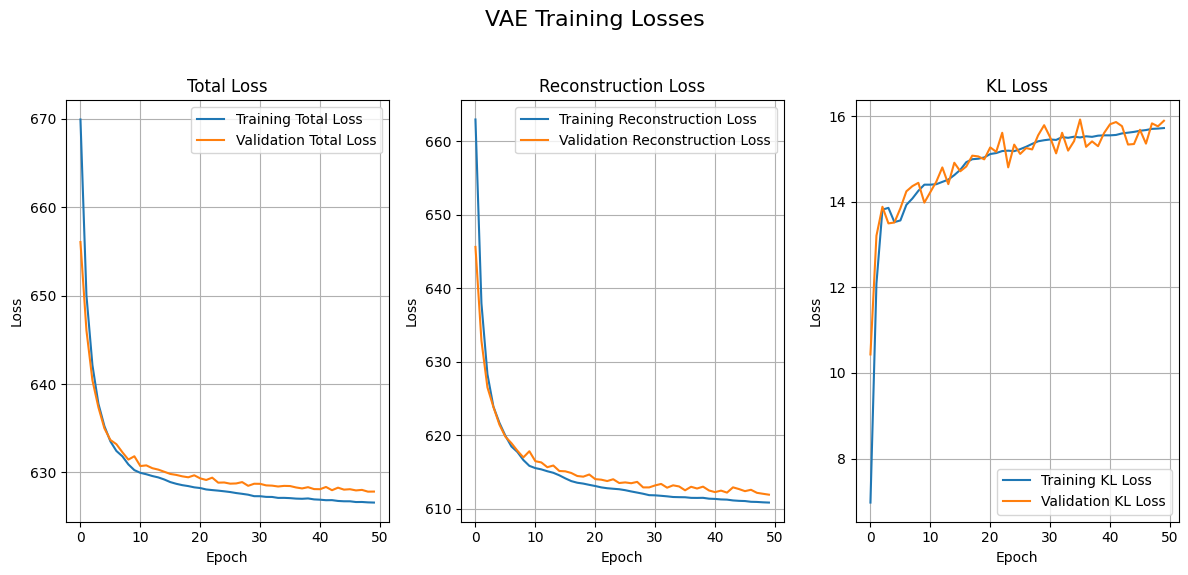


Generating images by sampling the latent space...
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


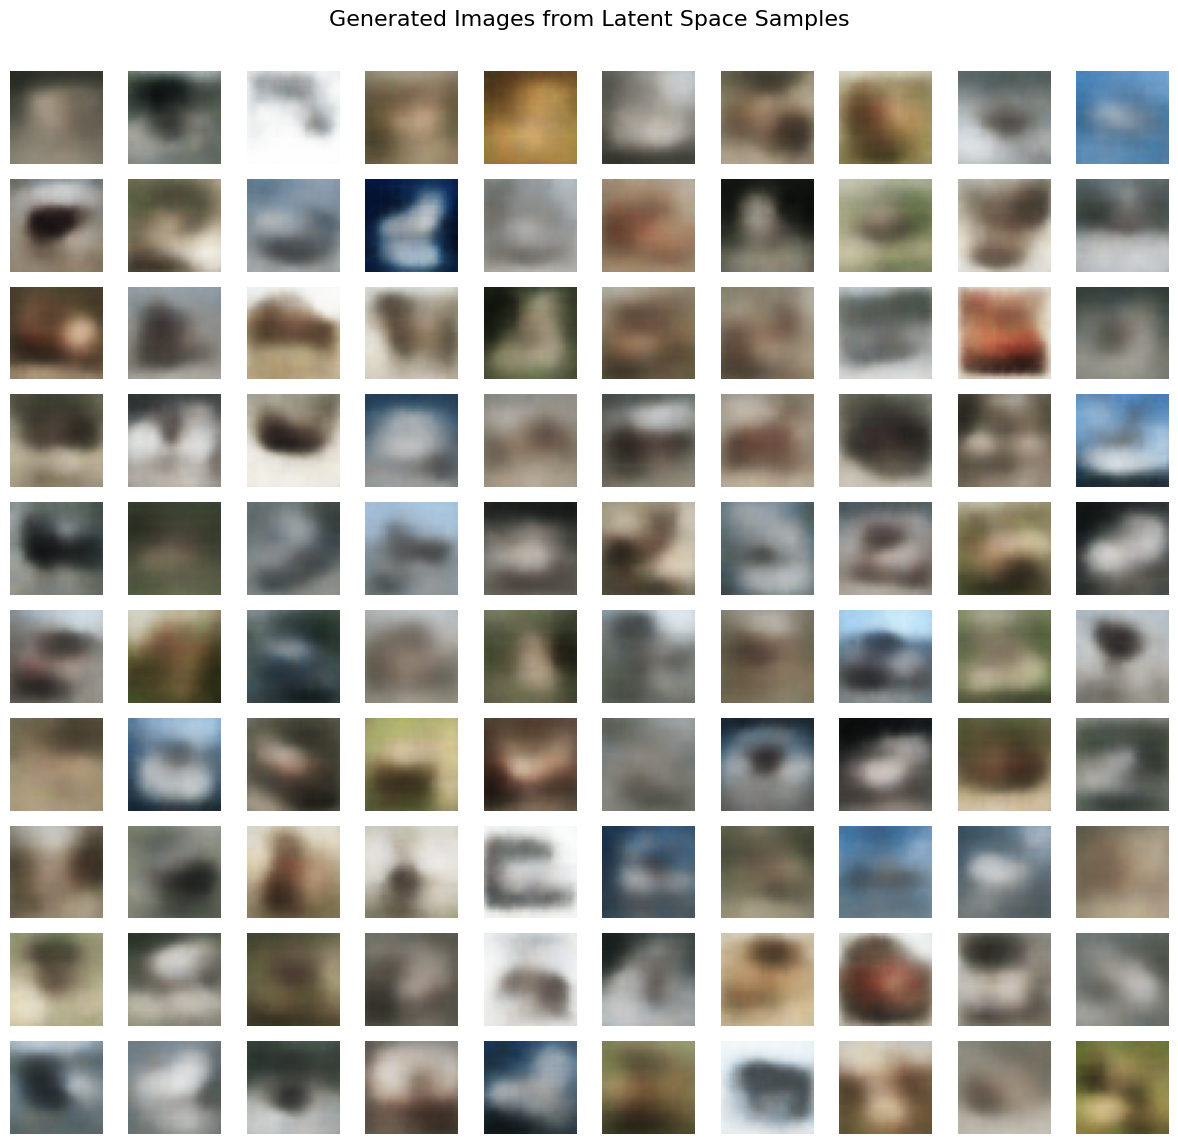


Visualizing reconstructions...
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step


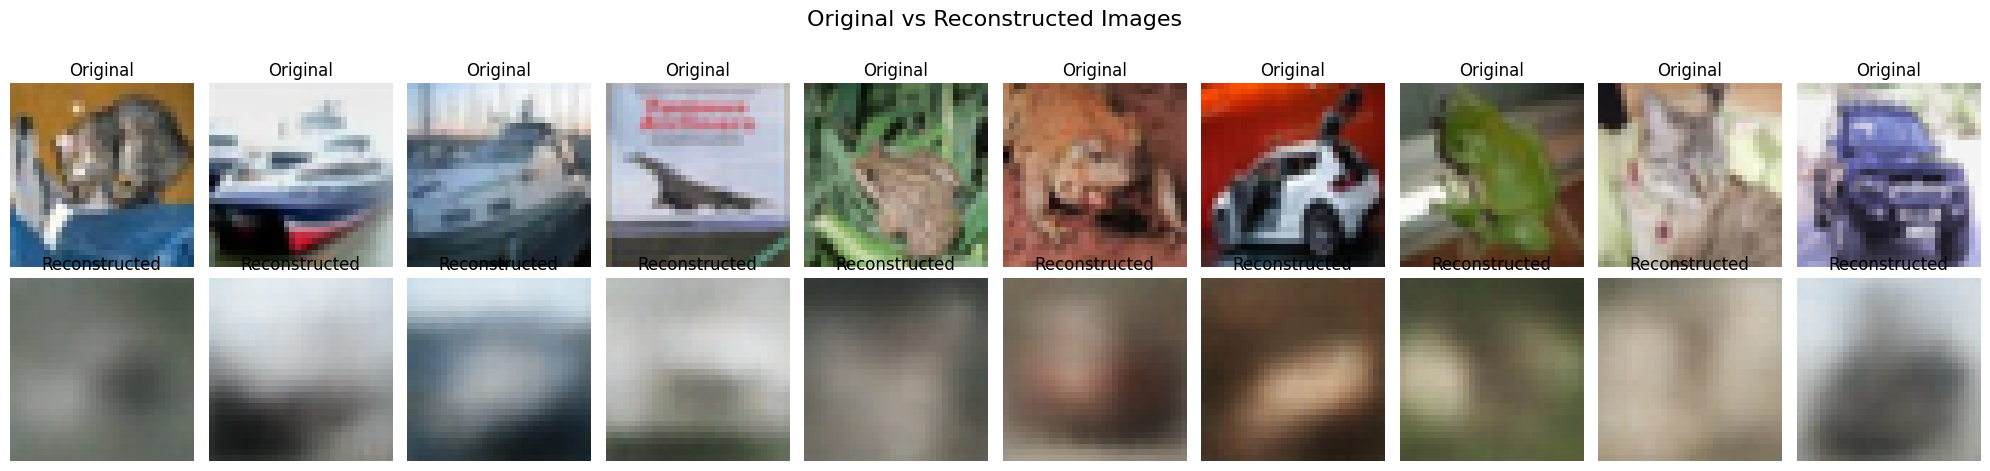

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS = 32, 32, 3
BATCH_SIZE = 128
LATENT_DIM = 128
EPOCHS = 50

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = y_train.flatten()
y_test = y_test.flatten()

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

train_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_dataset = test_dataset.batch(BATCH_SIZE)


encoder_inputs = keras.Input(shape=(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)

z_mean = layers.Dense(LATENT_DIM, name="z_mean")(x)
z_log_var = layers.Dense(LATENT_DIM, name="z_log_var")(x)

def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(LATENT_DIM,), name="z")([z_mean, z_log_var])

encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()


latent_inputs = keras.Input(shape=(LATENT_DIM,))
x = layers.Dense(8 * 8 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((8, 8, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(IMG_CHANNELS, 3, activation="sigmoid", padding="same")(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        if isinstance(data, tuple):
             if len(data) == 2:
                 data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2),
                )
            )

            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(
                    1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var),
                    axis=1,
                )
            )
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {m.name: m.result() for m in self.metrics}


    def test_step(self, data):
        if isinstance(data, tuple):
            if len(data) == 2:
                 data = data[0]

        z_mean, z_log_var, z = self.encoder(data, training=False) # Make sure batch norm/dropout are in inference mode
        reconstruction = self.decoder(z, training=False)

        reconstruction_loss = tf.reduce_mean(
            tf.reduce_sum(
                keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
            )
        )
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1
            )
        )
        total_loss = reconstruction_loss + kl_loss

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {m.name: m.result() for m in self.metrics}

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstruction = self.decoder(z)
        return reconstruction


vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

print("\nStarting VAE Training...")
history = vae.fit(x_train, x_train,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  validation_data=(x_test, x_test))
print("Training Finished.")


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
if 'total_loss' in history.history:
    plt.plot(history.history['total_loss'], label='Training Total Loss')
if 'val_total_loss' in history.history:
    plt.plot(history.history['val_total_loss'], label='Validation Total Loss')
plt.title('Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
if 'total_loss' in history.history or 'val_total_loss' in history.history:
    plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
if 'reconstruction_loss' in history.history:
    plt.plot(history.history['reconstruction_loss'], label='Training Reconstruction Loss')
if 'val_reconstruction_loss' in history.history:
    plt.plot(history.history['val_reconstruction_loss'], label='Validation Reconstruction Loss')
plt.title('Reconstruction Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
if 'reconstruction_loss' in history.history or 'val_reconstruction_loss' in history.history:
    plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
if 'kl_loss' in history.history:
    plt.plot(history.history['kl_loss'], label='Training KL Loss')
if 'val_kl_loss' in history.history:
    plt.plot(history.history['val_kl_loss'], label='Validation KL Loss')
plt.title('KL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
if 'kl_loss' in history.history or 'val_kl_loss' in history.history:
    plt.legend()
plt.grid(True)

plt.suptitle('VAE Training Losses', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


def plot_latent_space_samples(vae_model, n=15, figsize=15):
    random_latent_vectors = tf.random.normal(shape=(n * n, LATENT_DIM))
    generated_images = vae_model.decoder.predict(random_latent_vectors)

    plt.figure(figsize=(figsize, figsize))
    for i in range(n * n):
        ax = plt.subplot(n, n, i + 1)
        plt.imshow(generated_images[i])
        plt.axis("off")
    plt.suptitle("Generated Images from Latent Space Samples", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

print("\nGenerating images by sampling the latent space...")
plot_latent_space_samples(vae, n=10, figsize=12)


def plot_reconstructions(vae_model, data, n=10, figsize=15):
    # Ensure we don't request more samples than available
    num_samples = min(n * n, data.shape[0])
    if num_samples < n:
        print(f"Warning: Requested {n} samples for reconstruction, but only {num_samples} are available in the provided data.")
        n = int(np.sqrt(num_samples)) # Adjust n if needed, or handle differently
        if n == 0: return # Cannot plot if no samples


    reconstructed_images = vae_model.predict(data[:num_samples])

    plt.figure(figsize=(figsize, figsize // (n//2) + 1 if n > 0 else figsize))
    plt.suptitle("Original vs Reconstructed Images", fontsize=16)
    for i in range(n): # Iterate up to the potentially adjusted n
        # Plot original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(data[i])
        plt.title("Original")
        plt.axis("off")

        # Plot reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed_images[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

print("\nVisualizing reconstructions...")
plot_reconstructions(vae, x_test, n=10, figsize=20)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 16, 16,    │        896 │ input_layer_14[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 8, 8, 64)  │     18,496 │ conv2d_39[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 4096)      │          0 │ conv2d_40[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 256)       │  1,048,832 │ flatten_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 128)       │     32,896 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 128)       │     32,896 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z (Lambda)          │ (None, 128)       │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,134,016 (4.33 MB)

 Trainable params: 1,134,016 (4.33 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4096)           │       528,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_19             │ (None, 16, 16, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_20             │ (None, 32, 32, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_21             │ (None, 32, 32, 3)      │           867 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 584,643 (2.23 MB)

 Trainable params: 584,643 (2.23 MB)

 Non-trainable params: 0 (0.00 B)


Starting VAE Training...
Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - kl_loss: 4.0565 - reconstruction_loss: 683.1481 - total_loss: 687.2047 - val_kl_loss: 11.7644 - val_reconstruction_loss: 641.3160 - val_total_loss: 653.0801
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - kl_loss: 12.4821 - reconstruction_loss: 637.3182 - total_loss: 649.8002 - val_kl_loss: 13.2389 - val_reconstruction_loss: 628.5725 - val_total_loss: 641.8115
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - kl_loss: 13.0975 - reconstruction_loss: 625.6973 - total_loss: 638.7947 - val_kl_loss: 13.5659 - val_reconstruction_loss: 621.8347 - val_total_loss: 635.4006
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - kl_loss: 13.8899 - reconstruction_loss: 619.6292 - total_loss: 633.5192 - val_kl_loss: 14.2586 - val_reconstruction_loss: 619.6502 - val_total_loss: 633.9088
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - kl_loss: 14.5749 - reconstruction_loss: 617.3759 - total_loss:

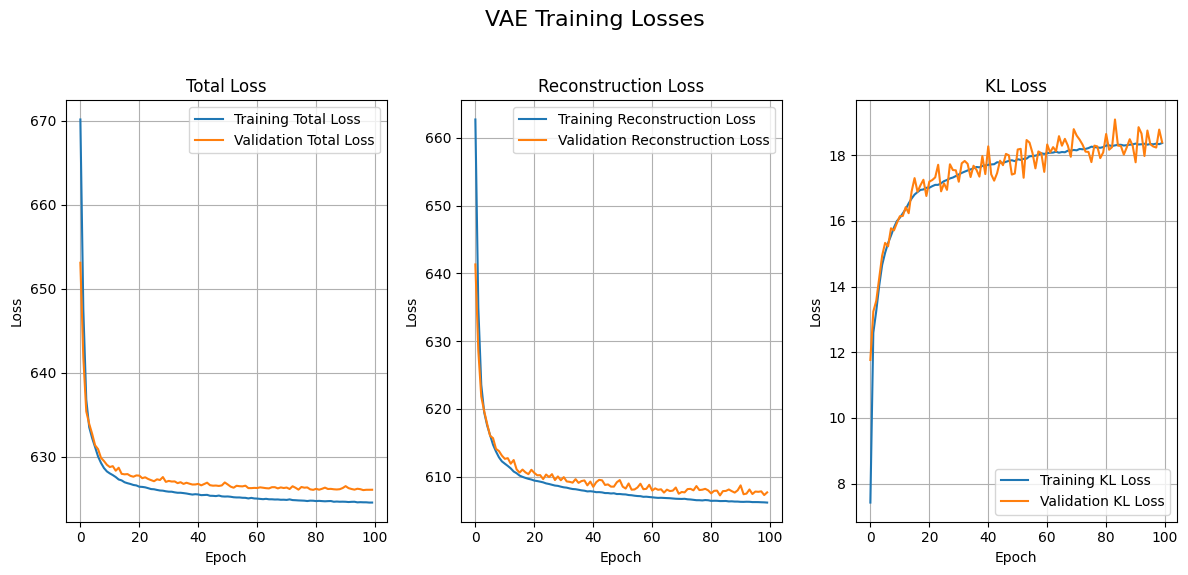


Generating images by sampling the latent space...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


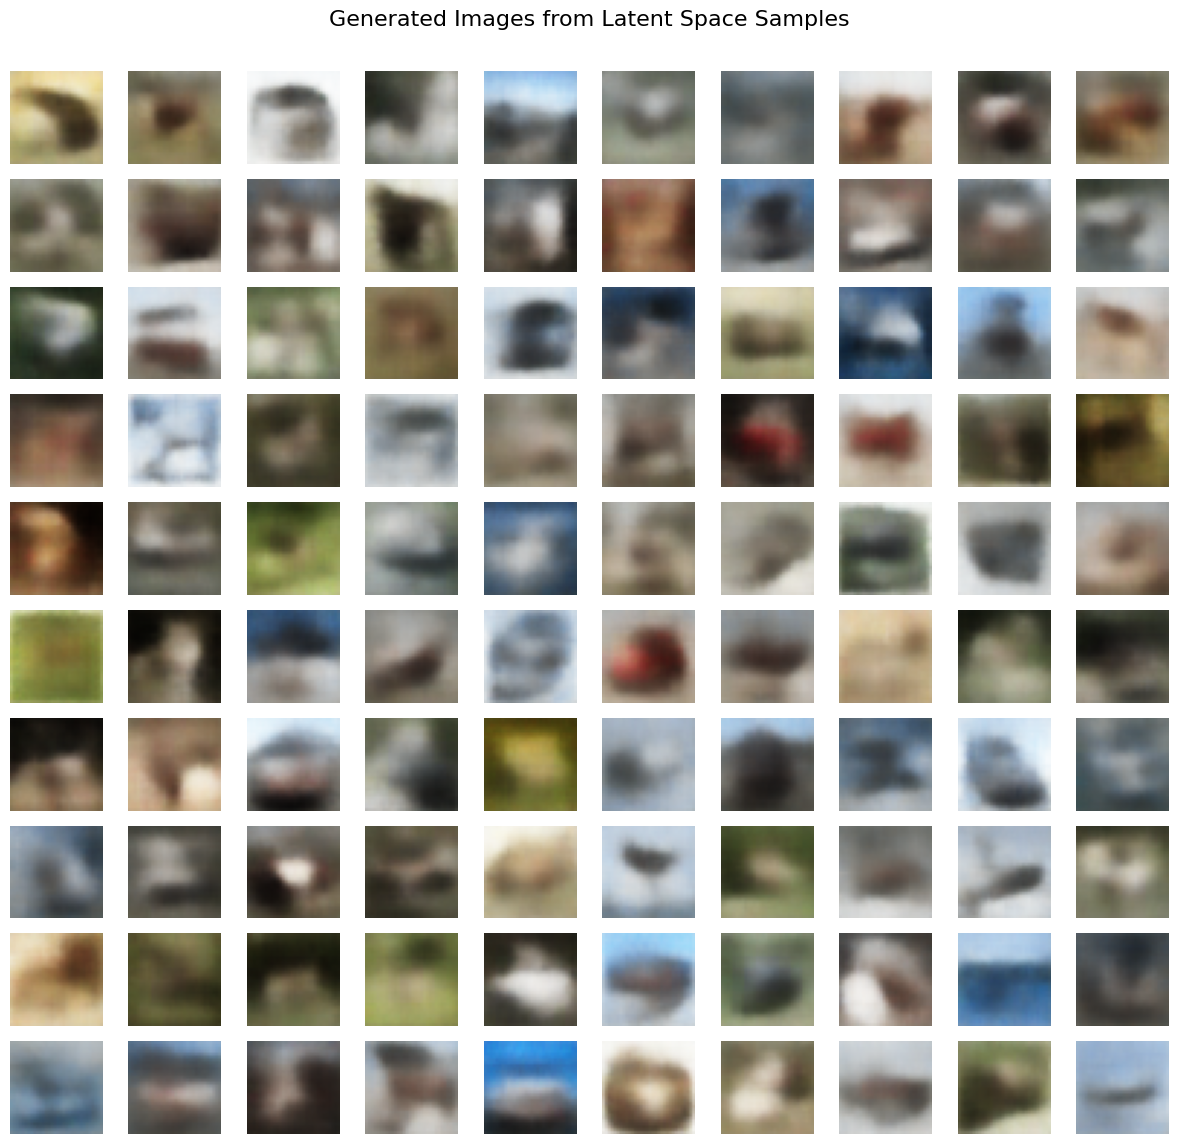


Visualizing reconstructions...
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step


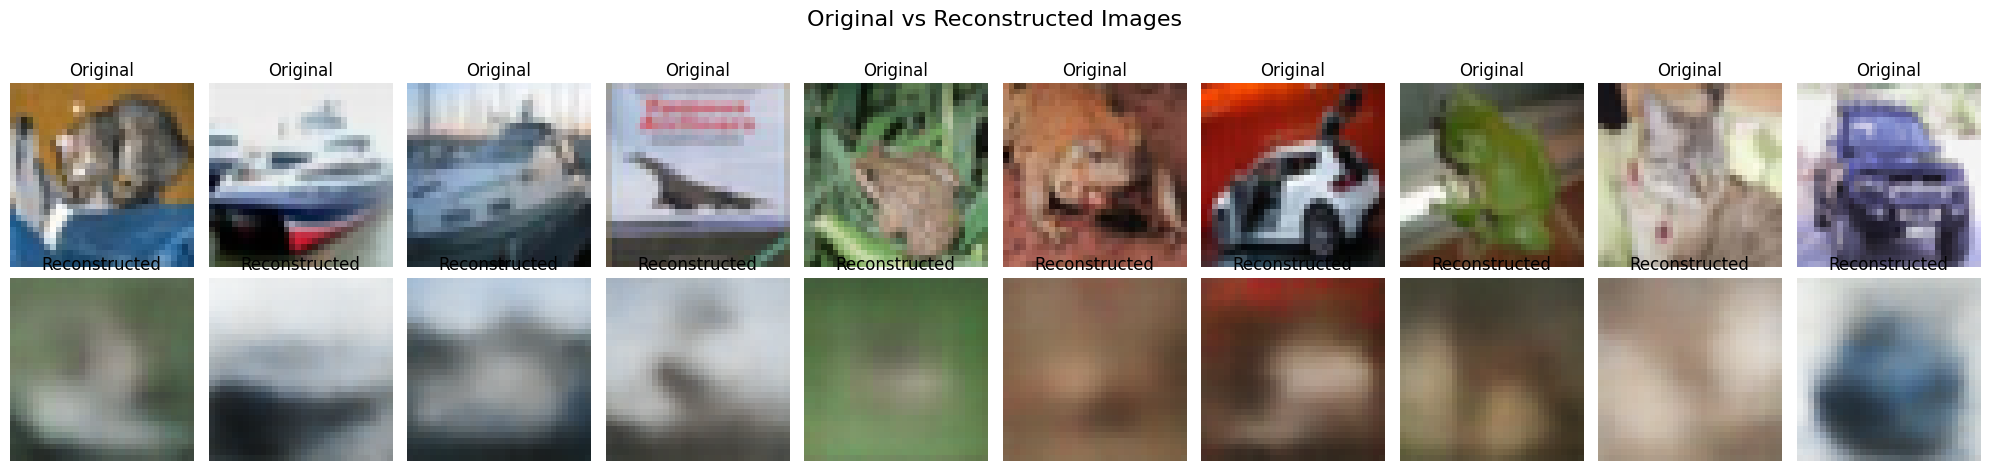

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS = 32, 32, 3
BATCH_SIZE = 128
LATENT_DIM = 128
EPOCHS = 100

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = y_train.flatten()
y_test = y_test.flatten()

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

train_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_dataset = test_dataset.batch(BATCH_SIZE)


encoder_inputs = keras.Input(shape=(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)

z_mean = layers.Dense(LATENT_DIM, name="z_mean")(x)
z_log_var = layers.Dense(LATENT_DIM, name="z_log_var")(x)

def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(LATENT_DIM,), name="z")([z_mean, z_log_var])

encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()


latent_inputs = keras.Input(shape=(LATENT_DIM,))
x = layers.Dense(8 * 8 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((8, 8, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(IMG_CHANNELS, 3, activation="sigmoid", padding="same")(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        if isinstance(data, tuple):
             if len(data) == 2:
                 data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2),
                )
            )

            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(
                    1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var),
                    axis=1,
                )
            )
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {m.name: m.result() for m in self.metrics}


    def test_step(self, data):
        if isinstance(data, tuple):
            if len(data) == 2:
                 data = data[0]

        z_mean, z_log_var, z = self.encoder(data, training=False) # Make sure batch norm/dropout are in inference mode
        reconstruction = self.decoder(z, training=False)

        reconstruction_loss = tf.reduce_mean(
            tf.reduce_sum(
                keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
            )
        )
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1
            )
        )
        total_loss = reconstruction_loss + kl_loss

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {m.name: m.result() for m in self.metrics}

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstruction = self.decoder(z)
        return reconstruction


vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

print("\nStarting VAE Training...")
history = vae.fit(x_train, x_train,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  validation_data=(x_test, x_test))
print("Training Finished.")


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
if 'total_loss' in history.history:
    plt.plot(history.history['total_loss'], label='Training Total Loss')
if 'val_total_loss' in history.history:
    plt.plot(history.history['val_total_loss'], label='Validation Total Loss')
plt.title('Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
if 'total_loss' in history.history or 'val_total_loss' in history.history:
    plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
if 'reconstruction_loss' in history.history:
    plt.plot(history.history['reconstruction_loss'], label='Training Reconstruction Loss')
if 'val_reconstruction_loss' in history.history:
    plt.plot(history.history['val_reconstruction_loss'], label='Validation Reconstruction Loss')
plt.title('Reconstruction Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
if 'reconstruction_loss' in history.history or 'val_reconstruction_loss' in history.history:
    plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
if 'kl_loss' in history.history:
    plt.plot(history.history['kl_loss'], label='Training KL Loss')
if 'val_kl_loss' in history.history:
    plt.plot(history.history['val_kl_loss'], label='Validation KL Loss')
plt.title('KL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
if 'kl_loss' in history.history or 'val_kl_loss' in history.history:
    plt.legend()
plt.grid(True)

plt.suptitle('VAE Training Losses', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


def plot_latent_space_samples(vae_model, n=15, figsize=15):
    random_latent_vectors = tf.random.normal(shape=(n * n, LATENT_DIM))
    generated_images = vae_model.decoder.predict(random_latent_vectors)

    plt.figure(figsize=(figsize, figsize))
    for i in range(n * n):
        ax = plt.subplot(n, n, i + 1)
        plt.imshow(generated_images[i])
        plt.axis("off")
    plt.suptitle("Generated Images from Latent Space Samples", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

print("\nGenerating images by sampling the latent space...")
plot_latent_space_samples(vae, n=10, figsize=12)


def plot_reconstructions(vae_model, data, n=10, figsize=15):
    # Ensure we don't request more samples than available
    num_samples = min(n * n, data.shape[0])
    if num_samples < n:
        print(f"Warning: Requested {n} samples for reconstruction, but only {num_samples} are available in the provided data.")
        n = int(np.sqrt(num_samples)) # Adjust n if needed, or handle differently
        if n == 0: return # Cannot plot if no samples


    reconstructed_images = vae_model.predict(data[:num_samples])

    plt.figure(figsize=(figsize, figsize // (n//2) + 1 if n > 0 else figsize))
    plt.suptitle("Original vs Reconstructed Images", fontsize=16)
    for i in range(n): # Iterate up to the potentially adjusted n
        # Plot original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(data[i])
        plt.title("Original")
        plt.axis("off")

        # Plot reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed_images[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

print("\nVisualizing reconstructions...")
plot_reconstructions(vae, x_test, n=10, figsize=20)